In [94]:
import pandas as pd
import os
import scipy.io as sio
import scipy
from statsmodels.stats.anova import AnovaRM
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [178]:
df1_DDM = pd.read_csv(('DDMdifResultDutilh2019.csv'))
df1_DDM["Dataset"] = ["Dutilh (2019)"]*len(df1_DDM)
df1_DDM["Model"] = ["DDM"]*len(df1_DDM)

In [47]:
df2_DDM = pd.read_csv(('DDMdifResultDutilh2013.csv'))
df2_DDM["Dataset"] = ["Dutilh (2013)"]*len(df2_DDM)
df2_DDM["Model"] = ["DDM"]*len(df2_DDM)

In [48]:
df3_DDM = pd.read_csv(('DDMdifResultEvans2017.csv'))
df3_DDM["Dataset"] = ["Evans (2017)"]*len(df3_DDM)
df3_DDM["Model"] = ["DDM"]*len(df3_DDM)

In [49]:
df4_DDM = pd.read_csv(('DDMdifResultEJ2008.csv'))
df4_DDM["Dataset"] = ["Wagenmakers (2008)"]*len(df4_DDM)
df4_DDM["Model"] = ["DDM"]*len(df4_DDM)

In [50]:
df5_DDM = pd.read_csv(('DDMdifResultRae2014.csv'))
df5_DDM["Dataset"] = ["Rae (2014)"]*len(df5_DDM)
df5_DDM["Model"] = ["DDM"]*len(df5_DDM)

In [51]:
df6_DDM = pd.read_csv(('DDMdifResultLerche2017.csv'))
df6_DDM["Dataset"] = ["Lerche (2017)"]*len(df6_DDM)
df6_DDM["Model"] = ["DDM"]*len(df6_DDM)

In [52]:
df1_OUM = pd.read_csv(('OUMdifResultDutilh2019.csv'))
df1_OUM["Dataset"] = ["Dutilh (2019)"]*len(df1_OUM)
df1_OUM["Model"] = ["OUM"]*len(df1_OUM)

In [53]:
df2_OUM = pd.read_csv(('OUMdifResultDutilh2013.csv'))
df2_OUM["Dataset"] = ["Dutilh (2013)"]*len(df2_OUM)
df2_OUM["Model"] = ["OUM"]*len(df2_OUM)

In [54]:
df3_OUM = pd.read_csv(('OUMdifResultEvans2017.csv'))
df3_OUM["Dataset"] = ["Evans (2017)"]*len(df3_OUM)
df3_OUM["Model"] = ["OUM"]*len(df3_OUM)

In [120]:
df4_OUM = pd.read_csv(('OUMdifResultEJ2008.csv'))
df4_OUM["Dataset"] = ["Wagenmakers (2008)"]*len(df4_OUM)
df4_OUM["Model"] = ["OUM"]*len(df4_OUM)

In [56]:
df5_OUM = pd.read_csv(('OUMdifResultRae2014.csv'))
df5_OUM["Dataset"] = ["Rae (2014)"]*len(df5_OUM)
df5_OUM["Model"] = ["OUM"]*len(df5_OUM)

In [57]:
df6_OUM = pd.read_csv(('OUMdifResultLerche2017.csv'))
df6_OUM["Dataset"] = ["Lerche (2017)"]*len(df6_OUM)
df6_OUM["Model"] = ["OUM"]*len(df6_OUM)

In [121]:
frames = [df1_DDM, df2_DDM, df3_DDM, df4_DDM, df5_DDM, df6_DDM,
          df1_OUM, df2_OUM, df3_OUM, df4_OUM, df5_OUM, df6_OUM]

df = pd.concat(frames)
df

,Unnamed: 0,Parameter,Difference,Dataset,Model
0,0,Drift Rate,1.126387,Dutilh (2019),DDM
1,1,Drift Rate,1.579487,Dutilh (2019),DDM
2,2,Drift Rate,2.290597,Dutilh (2019),DDM
3,3,Drift Rate,0.391332,Dutilh (2019),DDM
4,4,Drift Rate,0.113059,Dutilh (2019),DDM
...,...,...,...,...,...
147,147,Effective Inhibition,0.408172,Lerche (2017),OUM
148,148,Effective Inhibition,0.577311,Lerche (2017),OUM
149,149,Effective Inhibition,-0.310762,Lerche (2017),OUM
150,150,Effective Inhibition,-0.335869,Lerche (2017),OUM


In [119]:
df0 = df[df["Parameter"]=="Drift Rate"]
df0 = df0[df0["Dataset"]=="Dutilh (2013)"]


In [89]:
df0.loc[df0["Model"]=="DDM","Difference"] = (df0[df0["Model"]=="DDM"]["Difference"]-np.mean(df0[df0["Model"]=="DDM"]["Difference"]))/np.std(df0[df0["Model"]=="DDM"]["Difference"])

In [90]:
df0.loc[df0["Model"]=="OUM","Difference"] = (df0[df0["Model"]=="OUM"]["Difference"]-np.mean(df0[df0["Model"]=="OUM"]["Difference"]))/np.std(df0[df0["Model"]=="OUM"]["Difference"])

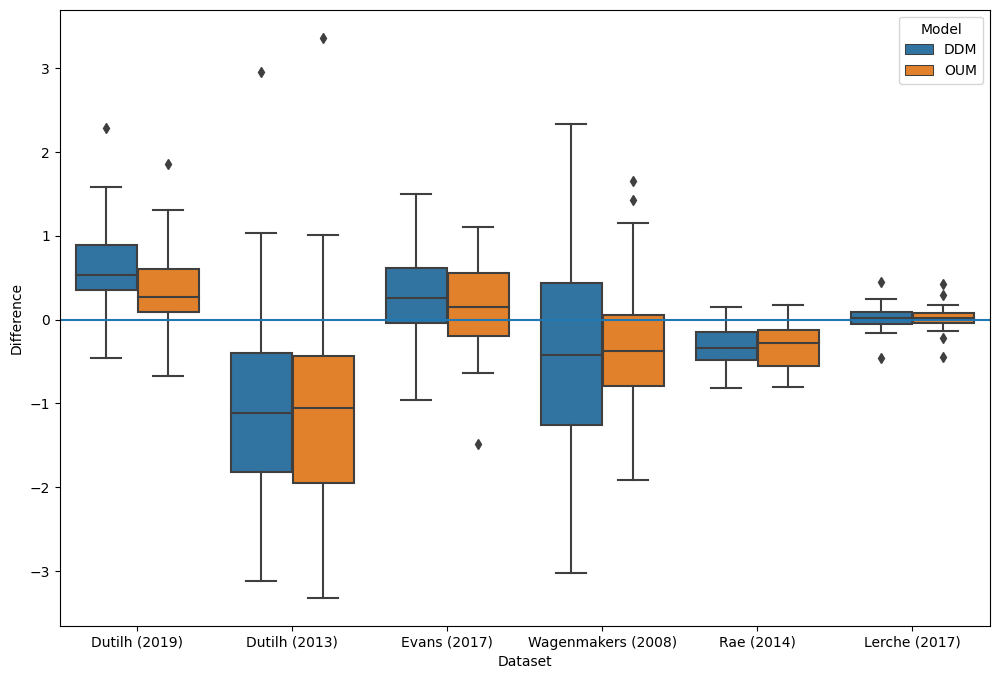

In [127]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.boxplot(data=df[df["Parameter"]=="Drift Rate"], x="Dataset", y="Difference", hue="Model",ax=ax)
ax.axhline(y=0)
plt.show()

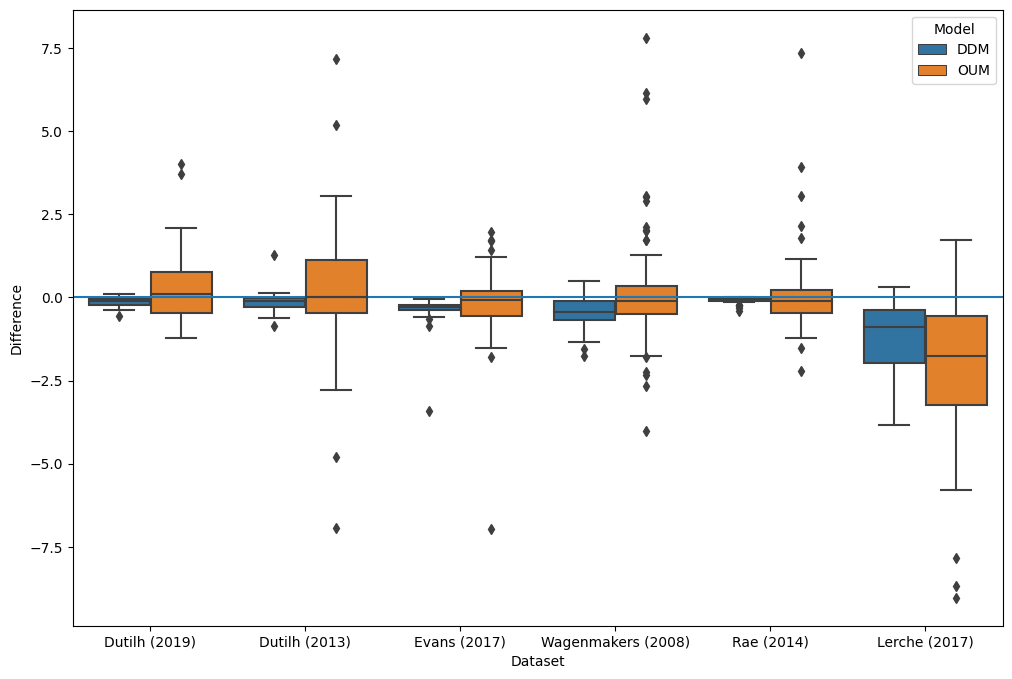

In [126]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.boxplot(data=df[df["Parameter"]=="Boundary Separation"], x="Dataset", y="Difference", hue="Model",ax=ax)
ax.axhline(y=0)
#ax.set_ylim(-6, 4)
plt.show()

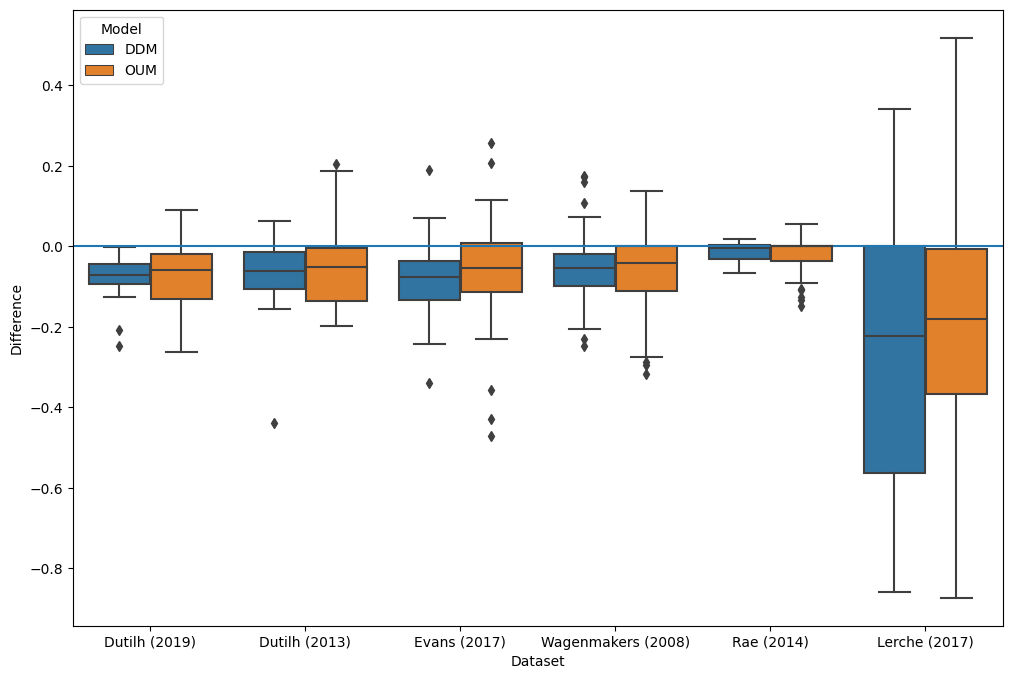

In [128]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.boxplot(data=df[df["Parameter"]=="Non-decision Time"], x="Dataset", y="Difference", hue="Model",ax=ax)
ax.axhline(y=0)
plt.show()

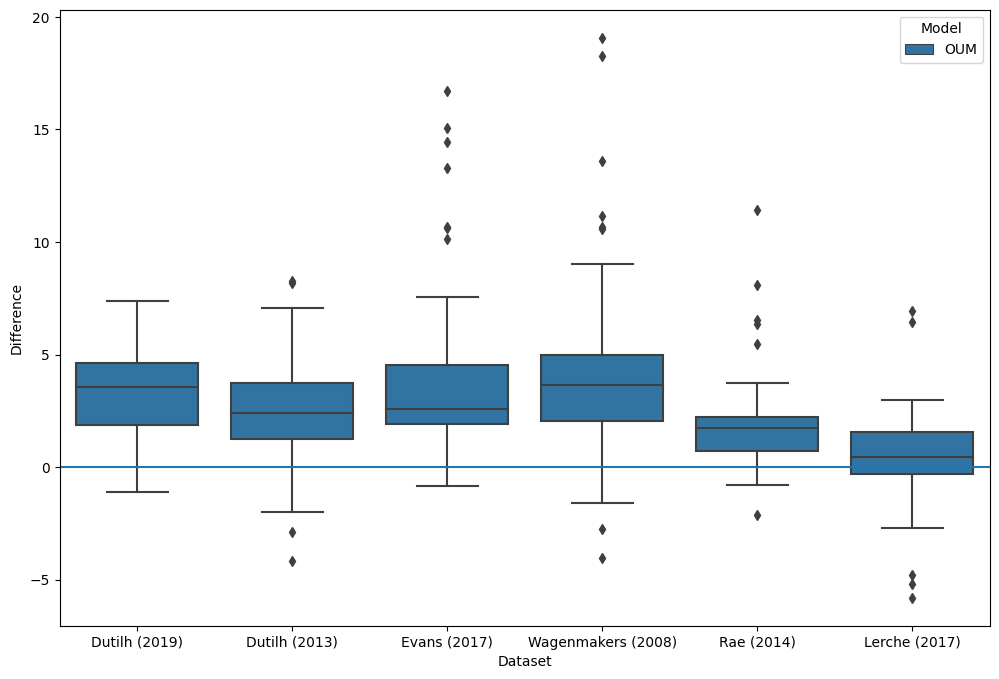

In [135]:

fig, ax = plt.subplots(figsize=(12, 8))
sns.boxplot(data=df[df["Parameter"]=="Effective Inhibition"], x="Dataset", y="Difference", hue="Model",ax=ax)
ax.axhline(y=0)
plt.show()

In [143]:
scipy.stats.ttest_1samp(np.array(dff[dff["Dataset"]=="Lerche (2017)"]["Difference"]), 0)

Ttest_1sampResult(statistic=1.1004033989067845, pvalue=0.2782642901220877)

## Standardize parameters for each model across SAT conditions

,Unnamed: 0,Drift Rate,Boundary Separation,Non-decision Time,SAT
0,0,2.669836,0.644488,0.342044,Speed
1,1,2.733912,0.560278,0.341720,Speed
2,2,3.691022,0.782163,0.255028,Speed
3,3,1.008260,0.512275,0.264132,Speed
4,4,2.487944,0.581977,0.227346,Speed
5,5,1.532395,0.570593,0.251258,Speed
6,6,1.870141,0.603854,0.244590,Speed
7,7,1.790169,0.717042,0.202264,Speed
8,8,1.951408,0.633014,0.224832,Speed
9,9,0.668692,0.424533,0.209960,Speed


In [204]:
def standardize_result(dataset, model):

    df100_DDM = pd.read_csv(model + "Result" + dataset + ".csv")

    ## calculate mean and std of each param for one dataset
    df100_DDM["v_mean"] = [np.mean(df100_DDM["Drift Rate"])]*len(df100_DDM.index)
    df100_DDM["v_sd"] = [np.std(df100_DDM["Drift Rate"])]*len(df100_DDM.index)

    df100_DDM["a_mean"] = [np.mean(df100_DDM["Boundary Separation"])]*len(df100_DDM.index)
    df100_DDM["a_sd"] = [np.std(df100_DDM["Boundary Separation"])]*len(df100_DDM.index)

    df100_DDM["ter_mean"] = [np.mean(df100_DDM["Non-decision Time"])]*len(df100_DDM.index)
    df100_DDM["ter_sd"] = [np.std(df100_DDM["Non-decision Time"])]*len(df100_DDM.index)

    # standardize
    df100_DDM["Drift Rate"] = (df100_DDM["Drift Rate"] - df100_DDM["v_mean"])/df100_DDM["v_sd"]
    df100_DDM["Boundary Separation"] = (df100_DDM["Boundary Separation"] - df100_DDM["a_mean"])/df100_DDM["a_sd"]
    df100_DDM["Non-decision Time"] = (df100_DDM["Non-decision Time"] - df100_DDM["ter_mean"])/df100_DDM["ter_sd"]
    
    if "Effective Inhibition" in list(df100_DDM.columns):
        df100_DDM["k_mean"] = [np.mean(df100_DDM["Effective Inhibition"])]*len(df100_DDM.index)
        df100_DDM["k_sd"] = [np.std(df100_DDM["Effective Inhibition"])]*len(df100_DDM.index)
        df100_DDM["Effective Inhibition"] = (df100_DDM["Effective Inhibition"] - df100_DDM["k_mean"])/df100_DDM["k_sd"]

    
    return(df100_DDM)

In [172]:
dataset = "Dutilh2019"
model = "DDM"
df100_DDM = standardize_result(dataset, model)

In [173]:
df_SAT = df100_DDM

In [205]:
def get_difference_DDM(dataset, df_SAT, model):
    S = np.array(df_SAT.loc[(df_SAT['SAT'] == "Speed")][["Drift Rate", "Boundary Separation", "Non-decision Time"]])
    A = np.array(df_SAT.loc[(df_SAT['SAT'] == "Accuracy")][["Drift Rate", "Boundary Separation", "Non-decision Time"]])
    dif = S-A
    df_dif = pd.DataFrame(dif,columns = ["Drift Rate", "Boundary Separation", "Non-decision Time"])


    df_dif_melted = pd.melt(df_dif, value_vars=['Drift Rate', 'Boundary Separation','Non-decision Time'],
                           var_name = "Parameter", value_name = "Difference")

    df_dif_melted["Dataset"] = [dataset]*len(df_dif_melted)
    df_dif_melted["Model"] = [model]*len(df_dif_melted)
    return(df_dif_melted)

def get_difference_OUM(dataset, df_SAT, model):
    S = np.array(df_SAT.loc[(df_SAT['SAT'] == "Speed")][["Drift Rate", "Boundary Separation", "Non-decision Time", "Effective Inhibition"]])
    A = np.array(df_SAT.loc[(df_SAT['SAT'] == "Accuracy")][["Drift Rate", "Boundary Separation", "Non-decision Time", "Effective Inhibition"]])
    dif = S-A
    df_dif = pd.DataFrame(dif,columns = ["Drift Rate", "Boundary Separation", "Non-decision Time", "Effective Inhibition"])
    df_dif_melted = pd.melt(df_dif, value_vars=['Drift Rate', 'Boundary Separation','Non-decision Time', "Effective Inhibition"],
                           var_name = "Parameter", value_name = "Difference")

    df_dif_melted["Dataset"] = [dataset]*len(df_dif_melted)
    df_dif_melted["Model"] = [model]*len(df_dif_melted)
    return(df_dif_melted)

In [219]:
datasets_labels = ["Dutilh (2019)", "Dutilh (2013)", "Evans (2017)", "EJ (2008)", "Rae (2014)", "Lerche (2017)"]


In [207]:
datasets_list = ["Dutilh2019", "Dutilh2013", "Evans2017", "EJ2008", "Rae2014", "Lerche2017"]
models_list = ["DDM", "OUM"]
df_z = pd.DataFrame(columns = ["Parameter", "Difference", "Dataset", "Model"])

for model in models_list:
    for dataset in datasets_list:
        if model == "DDM":
            df_SAT = standardize_result(dataset, model)
            df_SAT_dif = get_difference_DDM(dataset, df_SAT, model)
            df_z = df_z.append(df_SAT_dif)
        if model == "OUM":
            df_SAT = standardize_result(dataset, model)
            df_SAT_dif = get_difference_OUM(dataset, df_SAT, model)
            df_z = df_z.append(df_SAT_dif)
            

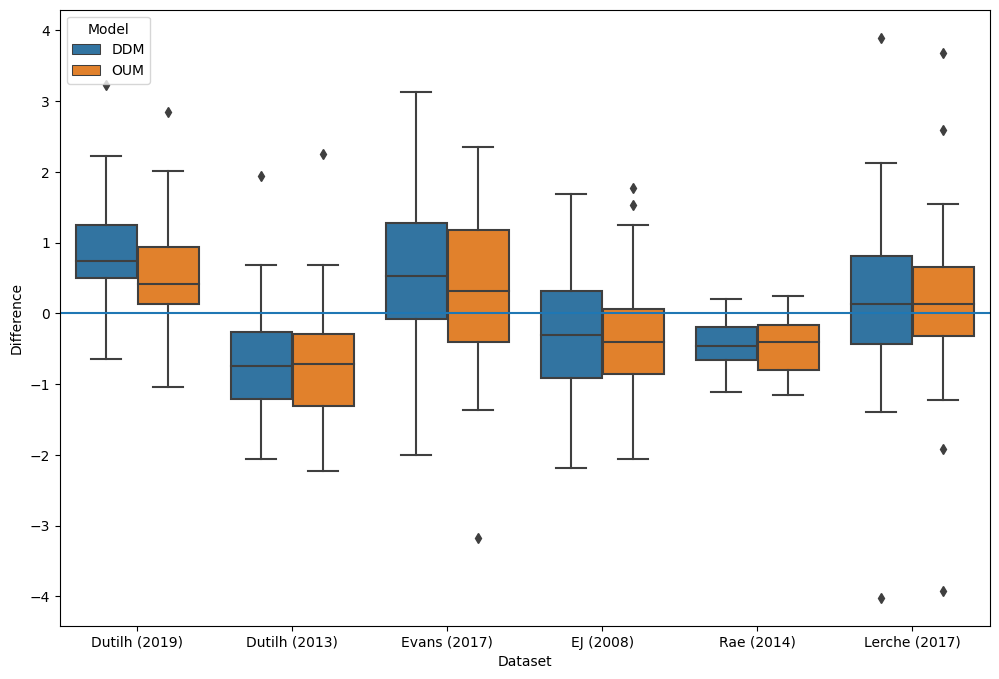

In [225]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.boxplot(data=df_z[df_z["Parameter"]=="Drift Rate"], x="Dataset", y="Difference", hue="Model",ax=ax)
ax.axhline(y=0)
ax.set_xticks(range(len(datasets_labels)), labels=datasets_labels)
plt.show()

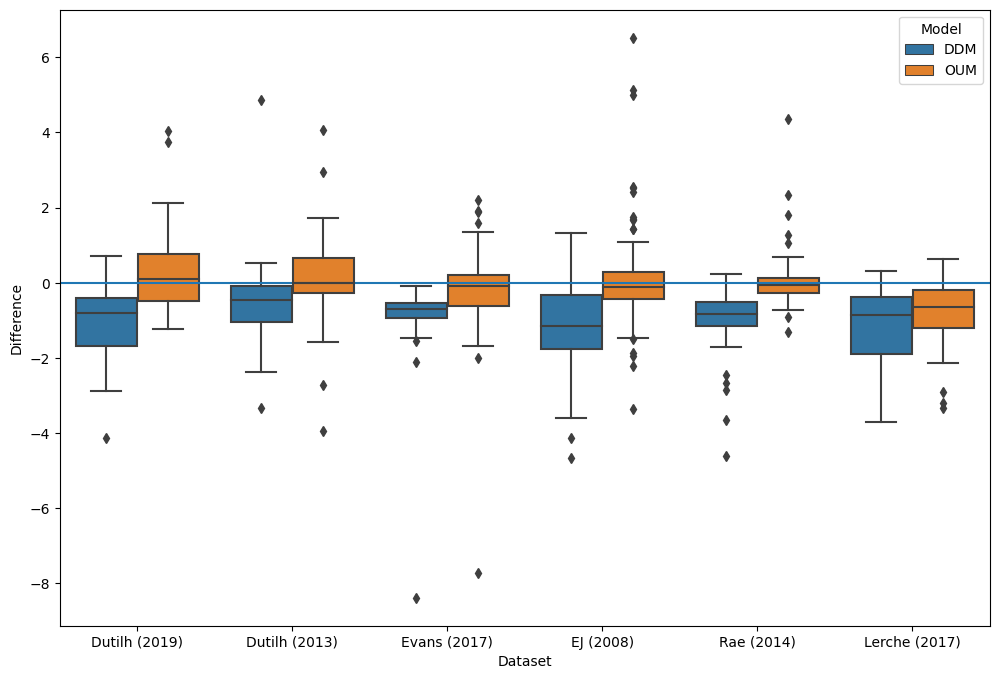

In [226]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.boxplot(data=df_z[df_z["Parameter"]=="Boundary Separation"], x="Dataset", y="Difference", hue="Model",ax=ax)
ax.axhline(y=0)
ax.set_xticks(range(len(datasets_labels)), labels=datasets_labels)
plt.show()

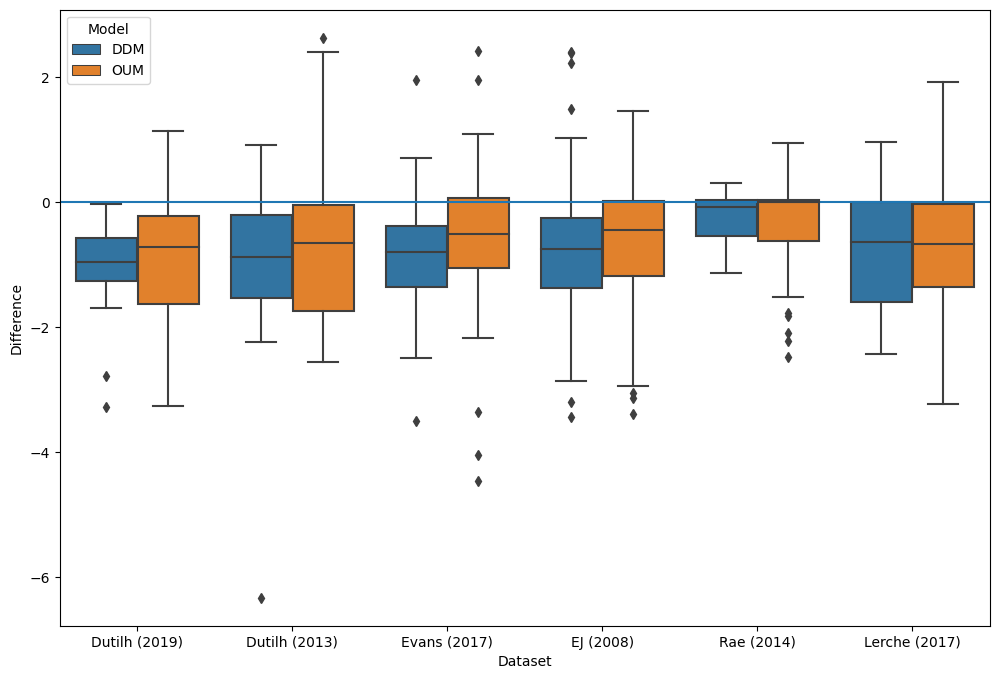

In [227]:

fig, ax = plt.subplots(figsize=(12, 8))
sns.boxplot(data=df_z[df_z["Parameter"]=="Non-decision Time"], x="Dataset", y="Difference", hue="Model",ax=ax)
ax.axhline(y=0)
ax.set_xticks(range(len(datasets_labels)), labels=datasets_labels)
plt.show()

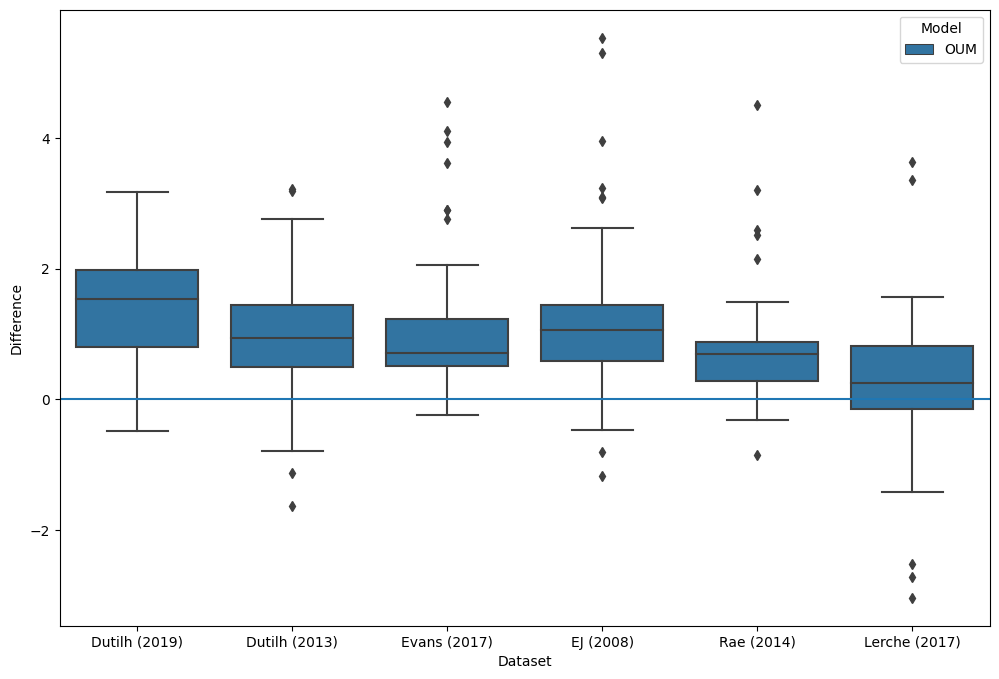

In [228]:

fig, ax = plt.subplots(figsize=(12, 8))
sns.boxplot(data=df_z[df_z["Parameter"]=="Effective Inhibition"], x="Dataset", y="Difference", hue="Model",ax=ax)
ax.axhline(y=0)
ax.set_xticks(range(len(datasets_labels)), labels=datasets_labels)
plt.show()